In [388]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [389]:
dataF = pd.read_csv("sourceDataSet.csv", delimiter=";")
dataF.drop_duplicates()
#Let's only keep data for seattle measures
dataF = dataF[dataF["City"] == "Seattle"]
#GFA is gross floor area

In [390]:
nonNullRate = []
for col in dataF.columns: 
    #we are counting the row with data and without Null or NaN over the number of rows
    nonNullRate.append({"columns": col, "type": str(dataF[col].dtypes) ,"filledRatio": round((dataF[col].count()/dataF.shape[0])*100, 3), "nbValues": dataF[col].nunique()})
nonNullRateFrame = pd.DataFrame(nonNullRate)    
#Etape de filtre
lessThanOnePercentColumns = nonNullRateFrame[nonNullRateFrame["filledRatio"] < 10]
moreThanOnePercentColumns = nonNullRateFrame[nonNullRateFrame["filledRatio"] > 10]
lessThanOnePercentColumns.describe
len(list(lessThanOnePercentColumns["columns"]))
moreThanOnePercentColumns

,columns,type,filledRatio,nbValues
0,OSEBuildingID,float64,100.000,3376
1,DataYear,float64,100.000,1
2,BuildingType,object,100.000,8
3,PrimaryPropertyType,object,100.000,24
4,PropertyName,object,100.000,3362
5,TaxParcelIdentificationNumber,float64,99.911,3265
7,CouncilDistrictCode,object,100.000,7
8,Neighborhood,object,100.000,19
9,YearBuilt,object,100.000,113
10,NumberofBuildings,object,99.763,17


In [396]:
#pretraitement de Neighborhood
#print(np.unique(dataF["Neighborhood"].values))
classifier = OneHotEncoder()
dataF["Neighborhood"] = dataF["Neighborhood"].str.lower()
dataF["Neighborhood"] = dataF["Neighborhood"].str.replace(" neighborhoods", "")
dataF["Neighborhood"] = dataF["Neighborhood"].str.strip()
#NeighborhoodStd = classifier.fit_transform(dataF["Neighborhood"].values.reshape(-1, 1))
#dataF["NeighborhoodStd"]  = NeighborhoodStd
dataF["NeighborhoodInt"]  = dataF["Neighborhood"]
uniqueNeighbourhouds = list(np.unique(dataF["Neighborhood"].values))
for key in range(0, len(uniqueNeighbourhouds)):
    dataF["NeighborhoodInt"] = dataF["NeighborhoodInt"].replace(uniqueNeighbourhouds[key], key)
print(list(np.unique(dataF["NeighborhoodInt"].values)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [412]:
#PrimaryPropertyType
uniquePropertyType = list(np.unique(dataF["PrimaryPropertyType"].values))
dataF["PrimaryPropertyType"] = dataF["PrimaryPropertyType"].str.lower()
dataF["PrimaryPropertyType"] = dataF["PrimaryPropertyType"].str.replace(" neighborhoods", "")
dataF["PrimaryPropertyType"] = dataF["PrimaryPropertyType"].str.strip()

dataF["PrimaryPropertyTypeInt"]  = dataF["PrimaryPropertyType"] 
for key in range(0, len(uniquePropertyType)):
    print(uniquePropertyType[key])
    dataF["PrimaryPropertyTypeInt"] = dataF["PrimaryPropertyTypeInt"].replace(uniquePropertyType[key], key)
print(list(np.unique(dataF["PrimaryPropertyTypeInt"].values)))

distribution center
high-rise multifamily
hospital
hotel
k-12 school
laboratory
large office
low-rise multifamily
medical office
mid-rise multifamily
mixed use property
office
other
refrigerated warehouse
residence hall
restaurant
retail store
self-storage facility
senior care community
small- and mid-sized office
supermarket / grocery store
university
warehouse
worship facility
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [434]:
#LargestPropertyUseType
print(list(np.unique(dataF["PrimaryPropertyType"].values)))
uniquePropertyType = list(np.unique(dataF["LargestPropertyUseType"].values))
dataF["LargestPropertyUseType"] = dataF["LargestPropertyUseType"].str.lower()
dataF["LargestPropertyUseType"] = dataF["LargestPropertyUseType"].str.replace(" neighborhoods", "")
dataF["LargestPropertyUseType"] = dataF["LargestPropertyUseType"].str.strip()

dataF["LargestPropertyUseTypeInt"]  = dataF["LargestPropertyUseType"] 
for key in range(0, len(uniquePropertyType)):
    print(uniquePropertyType[key])
    dataF["LargestPropertyUseTypeInt"] = dataF["LargestPropertyUseType"].replace(uniquePropertyType[key], key)
print(list(np.unique(dataF["PrimaryPropertyTypeInt"].values)))

['distribution center', 'high-rise multifamily', 'hospital', 'hotel', 'k-12 school', 'laboratory', 'large office', 'low-rise multifamily', 'medical office', 'mid-rise multifamily', 'mixed use property', 'office', 'other', 'refrigerated warehouse', 'residence hall', 'restaurant', 'retail store', 'self-storage facility', 'senior care community', 'small- and mid-sized office', 'supermarket / grocery store', 'university', 'warehouse', 'worship facility']


TypeError: '<' not supported between instances of 'str' and 'float'

In [413]:
# a lot of columns seems to be string but should be float or integer in fact 
#let's change that. 
nonNullRateFrame.columns.str.contains("kbtu")
kbtusColumns = nonNullRateFrame[nonNullRateFrame["columns"].str.contains("kBtu")]
CO2Columns = nonNullRateFrame[nonNullRateFrame["columns"].str.contains("CO2")]
kwhColumns = nonNullRateFrame[nonNullRateFrame["columns"].str.contains("kWh")]


In [422]:
listToChange = list(kwhColumns['columns'].values) + list(CO2Columns['columns'].values) + list(kbtusColumns['columns'].values)
listToChange = listToChange + ["Latitude", "Longitude", "YearBuilt", "ZipCode", "ENERGYSTARScore", "NumberofBuildings", "NumberofFloors"]
#listToChange = listToChange.append(list(CO2Columns['columns'].values))#.append(list(kbtusColumns['columns'].values))

In [423]:
for column in listToChange:
    dataF[column] = pd.to_numeric(dataF[column], errors='coerce')
    #dataF[column] = dataF[column].replace(np.nan, 0)

In [430]:
#Let's keep only EnergyScore with value <= 100
cleanDataF = dataF.loc[dataF["ENERGYSTARScore"] <= 100]
cleanDataF = cleanDataF.loc[cleanDataF["ENERGYSTARScore"] >= 0]
cleanDataF["ENERGYSTARScoreColor"] = cleanDataF["ENERGYSTARScore"]
#f = lambda x: "red" if x<25 else x
#cleanDataF["ENERGYSTARScoreColor"] = cleanDataF["ENERGYSTARScoreColor"].map(f)
#print(np.unique(cleanDataF["ENERGYSTARScoreColor"].values))
#cleanDataF["ENERGYSTARScoreColor"] = np.where(cleanDataF["ENERGYSTARScoreColor"]<25, "red", cleanDataF["ENERGYSTARScoreColor"])
#print(np.unique(cleanDataF["ENERGYSTARScoreColor"].values))
#cleanDataF.loc[cleanDataF["ENERGYSTARScoreColor"] > 25 & cleanDataF["ENERGYSTARScoreColor"] <= 75 , 'yellow']
#cleanDataF.loc[cleanDataF["ENERGYSTARScoreColor"] > 75 & cleanDataF["ENERGYSTARScoreColor"] <= 100 , 'green']
#cleanDataF.loc[lambda x: x["ENERGYSTARScore"] in range(25, 75)]

#cleanDataF["ENERGYSTARScoreColor"] = cleanDataF["ENERGYSTARScoreColor"].where(cleanDataF["ENERGYSTARScoreColor"].between(0, 25), "red")
#cleanDataF["ENERGYSTARScoreColor"] = cleanDataF["ENERGYSTARScoreColor"].where(cleanDataF["ENERGYSTARScoreColor"].between(26, 75), "yellow")
#cleanDataF["ENERGYSTARScoreColor"] = cleanDataF["ENERGYSTARScoreColor"].where(cleanDataF["ENERGYSTARScoreColor"].between(76, 100), "green")
print(list(np.unique(cleanDataF["ENERGYSTARScoreColor"])))

for i in range(0, cleanDataF.shape[0]):
    a = cleanDataF["ENERGYSTARScoreColor"].iloc[i]
    if int(a) >= 0 & int(a) <= 25:
        cleanDataF["ENERGYSTARScoreColor"].iloc[i] = "red"
    if int(a) > 25 & int(a) <= 75:
        cleanDataF["ENERGYSTARScoreColor"].iloc[i] = "yellow"
    if int(a) > 75 & int(a) <= 100:
        cleanDataF["ENERGYSTARScoreColor"].iloc[i] = "green"
np.unique(cleanDataF["ENERGYSTARScoreColor"].values)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]


/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


array(['green', 'red', 'yellow'], dtype=object)

In [432]:
nonNullRate = []
for col in cleanDataF.columns: 
    #we are counting the row with data and without Null or NaN over the number of rows
    nonNullRate.append({"columns": col, "type": str(cleanDataF[col].dtypes) ,"filledRatio": round((cleanDataF[col].count()/cleanDataF.shape[0])*100, 3), "nbValues": cleanDataF[col].nunique()})
nonNullRateFrame = pd.DataFrame(nonNullRate)    
#Etape de filtre
lessThanOnePercentColumns = nonNullRateFrame[nonNullRateFrame["filledRatio"] < 20]
moreThanOnePercentColumns = nonNullRateFrame[nonNullRateFrame["filledRatio"] > 20]
lessThanOnePercentColumns.describe
len(list(lessThanOnePercentColumns["columns"]))
moreThanOnePercentColumns

,columns,type,filledRatio,nbValues
0,OSEBuildingID,float64,100.000,2533
1,DataYear,float64,100.000,1
2,BuildingType,object,100.000,7
3,PrimaryPropertyType,object,100.000,20
4,PropertyName,object,100.000,2524
5,TaxParcelIdentificationNumber,float64,99.921,2465
7,CouncilDistrictCode,object,100.000,7
8,Neighborhood,object,100.000,13
9,YearBuilt,int64,100.000,111
10,NumberofBuildings,float64,100.000,12


In [426]:
columnsToBeFiltered = list(moreThanOnePercentColumns["columns"].values)
columnsToBeFiltered = columnsToBeFiltered + ["ENERGYSTARScoreColor"]
#columnsToBeFiltered.remove("Latitude")
#columnsToBeFiltered.remove("Longitude")
#columnsToBeFiltered.remove("Location")

columnsToBeFiltered.remove("ZipCode")
#columnsToBeFiltered.remove("F49")
#columnsToBeFiltered.remove("F51")
columnsToBeFiltered.remove("LargestPropertyUseType")
columnsToBeFiltered.remove("SecondLargestPropertyUseType")
columnsToBeFiltered.remove("SecondLargestPropertyUseTypeGFA")

#columnsToBeFiltered.remove("ENERGYSTARScoreColor")
columnsToBeFiltered.remove("File Paths")
#columnsToBeFiltered.remove("Seattle Police Department Micro Community Policing Plan Areas")
columnsToBeFiltered.remove("OSEBuildingID")
columnsToBeFiltered.remove("DataYear")
columnsToBeFiltered.remove("PropertyName")
columnsToBeFiltered.remove("CouncilDistrictCode")

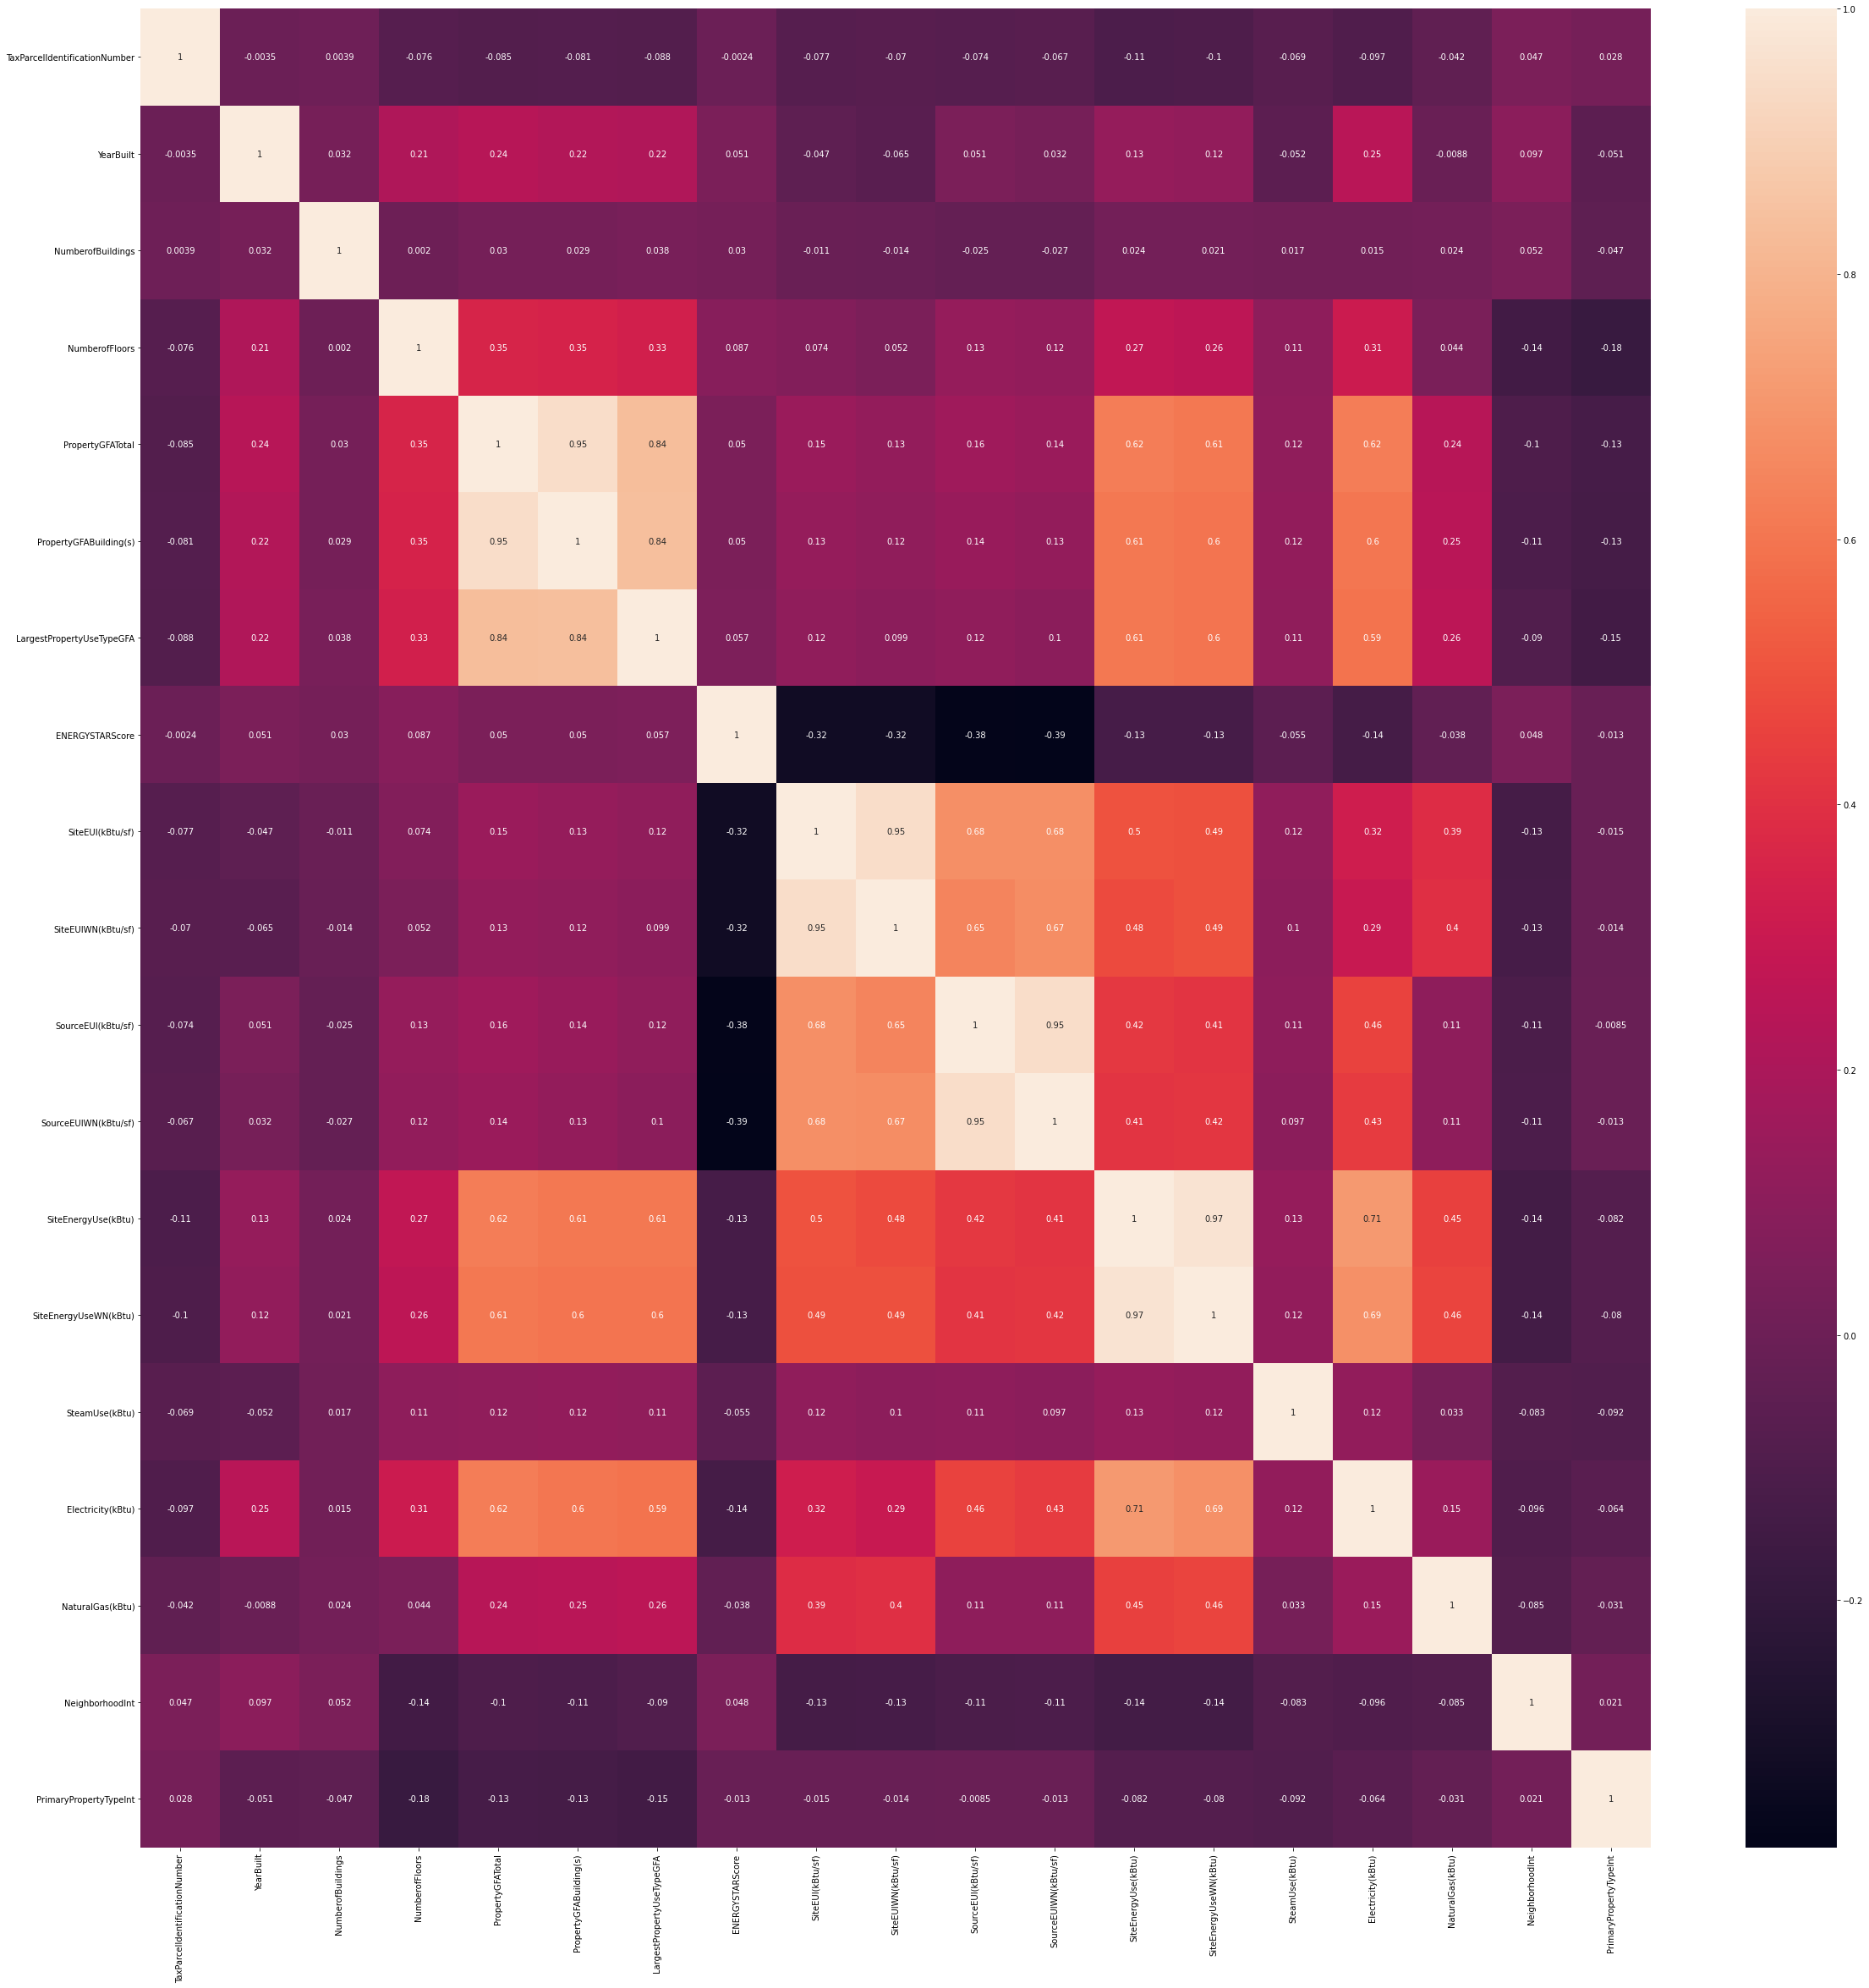

In [427]:
#correlations = dataF.corr(method="kendall")
#correlations = dataF.corr(method="spearman")


correlations = cleanDataF.filter(items=columnsToBeFiltered).corr(method="kendall")
f, ax = plt.subplots(figsize = (40, 40))
#regarder la distance par défault dans heatmap
figure = sns.heatmap(correlations, annot = True).get_figure()
figure.savefig("./Visuals/originalDFheatmap.jpg")

['BuildingType', 'PrimaryPropertyType', 'TaxParcelIdentificationNumber', 'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus', 'Address', 'City', 'State', 'TotalGHGEmissions', 'GHGEmissionsIntensity', 'NeighborhoodInt', 'PrimaryPropertyTypeInt', 'ENERGYSTARScoreColor', 'ENERGYSTARScoreColor']


/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not [array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['red', 'red'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['red', 'red'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['yellow', 'yellow'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['red', 'red'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object), array(['green', 'green'], dtype=object)]

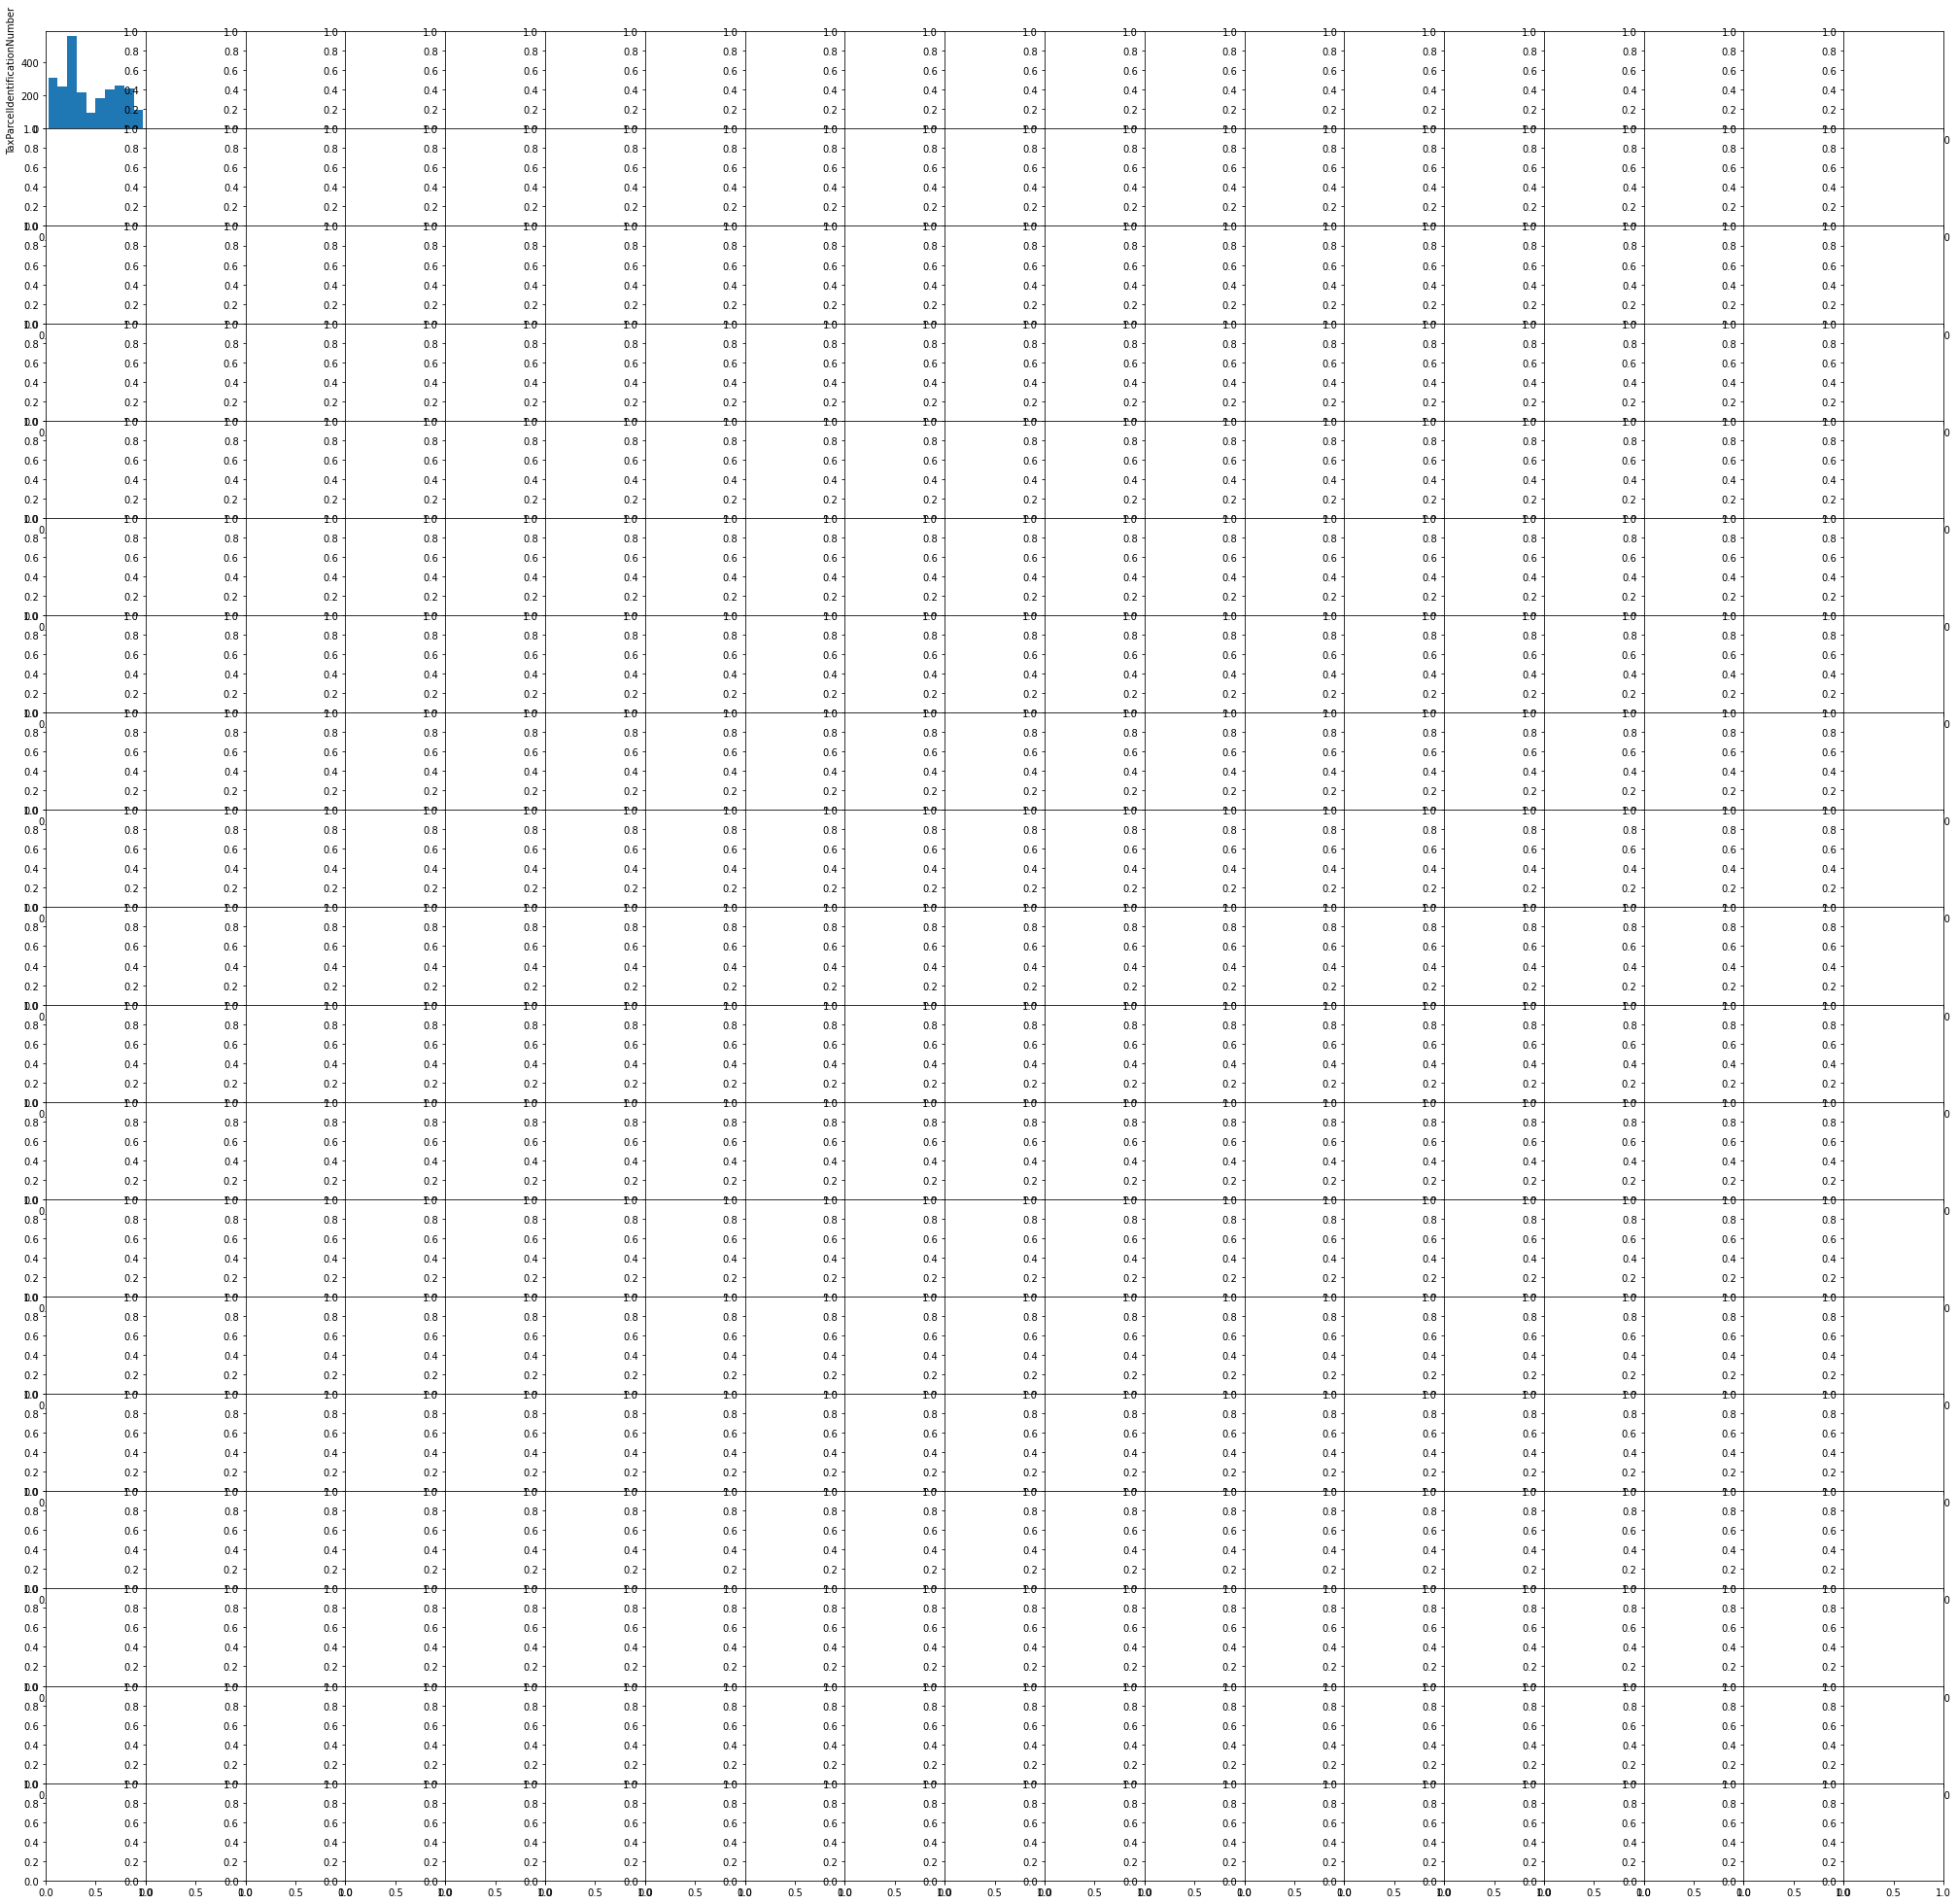

In [431]:
#c=list(filteredDF["ENERGYSTARScoreColor"].values

print(columnsToBeFiltered)
filteredDF = cleanDataF.filter(items=columnsToBeFiltered).dropna()
g = pd.plotting.scatter_matrix(filteredDF, c=list(filteredDF["ENERGYSTARScoreColor"].values), figsize=(35,35),  marker = '°',  alpha = 0.4).get_figure()
#figure = g[0,0].get_figure()
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()
#figure.savefig("./Visuals/originalScatterMatrix.jpg")

In [317]:
len(filteredDF.values)

2533

In [324]:
for column in columnsToBeFiltered:
    print(column)
    print(np.unique(filteredDF[column].values))

BuildingType
['Campus' 'Multifamily HR (10+)' 'Multifamily LR (1-4)'
 'Multifamily MR (5-9)' 'NonResidential' 'Nonresidential COS'
 'SPS-District K-12']
PrimaryPropertyType
['Distribution Center' 'High-Rise Multifamily' 'Hospital' 'Hotel'
 'K-12 School' 'Large Office' 'Low-Rise Multifamily' 'Medical Office'
 'Mid-Rise Multifamily' 'Mixed Use Property' 'Office' 'Other'
 'Refrigerated Warehouse' 'Residence Hall' 'Retail Store'
 'Senior Care Community' 'Small- and Mid-Sized Office'
 'Supermarket / Grocery Store' 'Warehouse' 'Worship Facility']
TaxParcelIdentificationNumber
[1.80011300e+06 1.80012800e+06 1.80015900e+06 ... 9.83520005e+09
            nan            nan]
Neighborhood
['BALLARD' 'Ballard' 'CENTRAL' 'Central' 'DELRIDGE' 'DOWNTOWN' 'Delridge'
 'EAST' 'GREATER DUWAMISH' 'LAKE UNION' 'MAGNOLIA / QUEEN ANNE' 'NORTH'
 'NORTHEAST' 'NORTHWEST' 'North' 'Northwest' 'SOUTHEAST' 'SOUTHWEST']
YearBuilt
['1900' '1901' '1902' '1903' '1904' '1905' '1906' '1907' '1908' '1909'
 '1910' '1911' '

In [274]:
dataF["PropertyName"].values

array(['MAYFLOWER PARK HOTEL', 'PARAMOUNT HOTEL', 'WESTIN HOTEL', ...,
       'Queen Anne Pool', 'South Park Community Center',
       'Van Asselt Community Center'], dtype=object)